<a href="https://colab.research.google.com/github/shruti63-code/EDA-on-Covid-19/blob/main/COVID_19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 COVID-19 Data Analysis & Forecasting

This notebook performs **Exploratory Data Analysis (EDA)** on COVID-19 datasets, including:
- Data cleaning & preprocessing
- Global & country-level trend analysis
- Visualizations (cases, deaths, vaccinations)
- Forecasting future COVID-19 cases using **Facebook Prophet**

In [ ]:
# STEP 1: Install dependencies
!pip install pandas matplotlib seaborn plotly prophet

In [ ]:
# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet

## Exploratory Data Analysis (EDA)

Now that the data is loaded, let's perform some exploratory data analysis to understand the dataset better. We can start by looking at the distribution of cases and deaths, analyzing trends over time, and exploring the data by country.

In [1]:
# Step 2: Upload the Dataset (Run this and select your csv file)
from google.colab import files
uploaded = files.upload()


Saving covid19_mock_owid.csv to covid19_mock_owid.csv


In [4]:
# Step 3: Load the Dataset
import pandas as pd
df = pd.read_csv("covid19_mock_owid.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (45, 7)


,date,location,total_cases,new_cases,total_deaths,new_deaths,population
0,2020-03-01,India,0,1000,0,50,1380004385
1,2020-03-02,India,1000,1000,50,50,1380004385
2,2020-03-03,India,2000,1000,100,50,1380004385
3,2020-03-04,India,3000,1000,150,50,1380004385
4,2020-03-05,India,4000,1000,200,50,1380004385


In [6]:
# Step 4: Basic Info
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Step 5: Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          45 non-null     object
 1   location      45 non-null     object
 2   total_cases   45 non-null     int64 
 3   new_cases     45 non-null     int64 
 4   total_deaths  45 non-null     int64 
 5   new_deaths    45 non-null     int64 
 6   population    45 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.6+ KB
None

Missing Values:
date            0
location        0
total_cases     0
new_cases       0
total_deaths    0
new_deaths      0
population      0
dtype: int64

Summary Statistics:
        total_cases    new_cases  total_deaths  new_deaths    population
count     45.000000    45.000000     45.000000   45.000000  4.500000e+01
mean   10500.000000  1500.000000    513.333333   73.333333  6.412015e+08
std     7381.641847   412.861412    363.161622   20.78

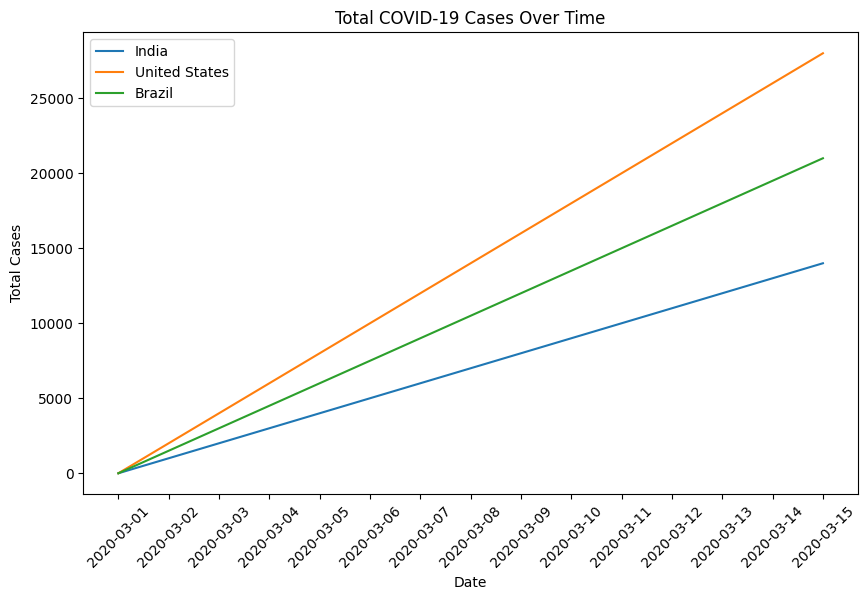

In [8]:
# Step 6: Total Cases Trend by Country
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for country in df['location'].unique():
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.legend()
plt.show()

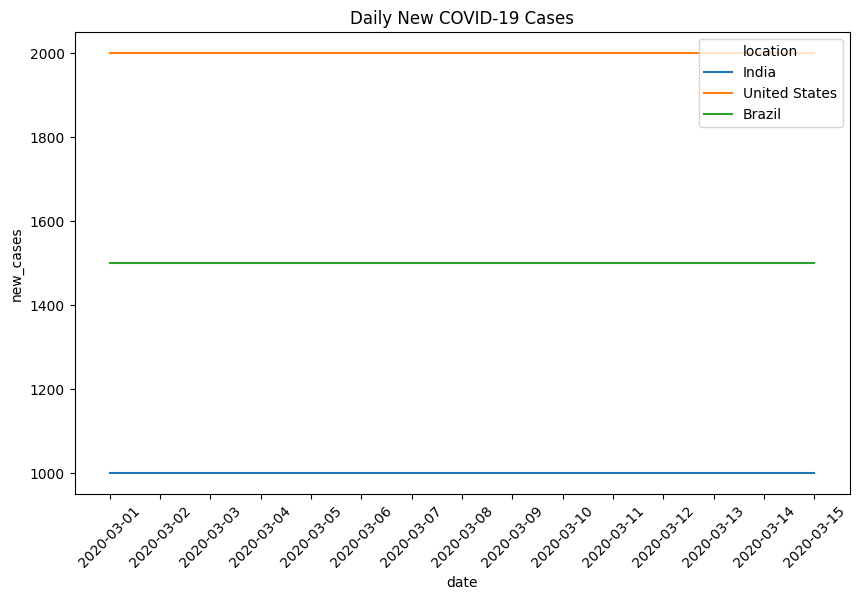

In [10]:
# Step 7: New Cases Trend
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="date", y="new_cases", hue="location")
plt.title("Daily New COVID-19 Cases")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1214277730.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="location", y="total_deaths", ci=None)


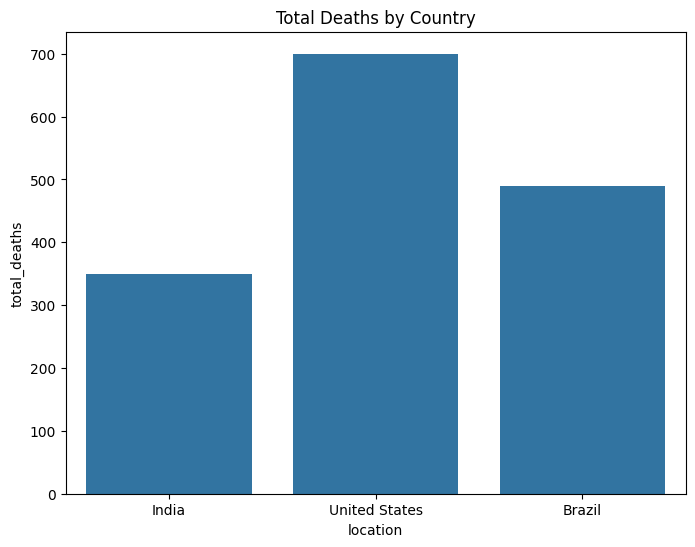

In [11]:
# Step 8: Total Deaths Comparison
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="location", y="total_deaths", ci=None)
plt.title("Total Deaths by Country")
plt.show()

/tmp/ipython-input-1388597350.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="location", y="cases_per_million", ci=None)


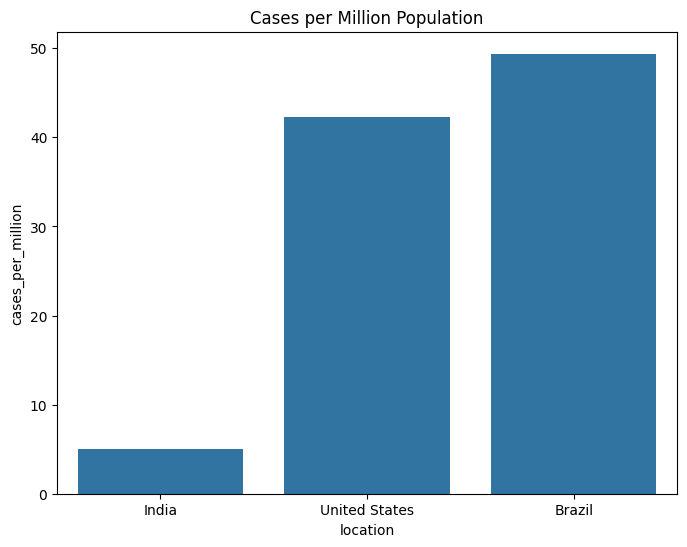

In [12]:
# Step 9: Cases per Population
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1_000_000

plt.figure(figsize=(8,6))
sns.barplot(data=df, x="location", y="cases_per_million", ci=None)
plt.title("Cases per Million Population")
plt.show()

In [13]:
# Step 10: Save Processed Data
df.to_csv("covid19_analysis_processed.csv", index=False)
files.download("covid19_analysis_processed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

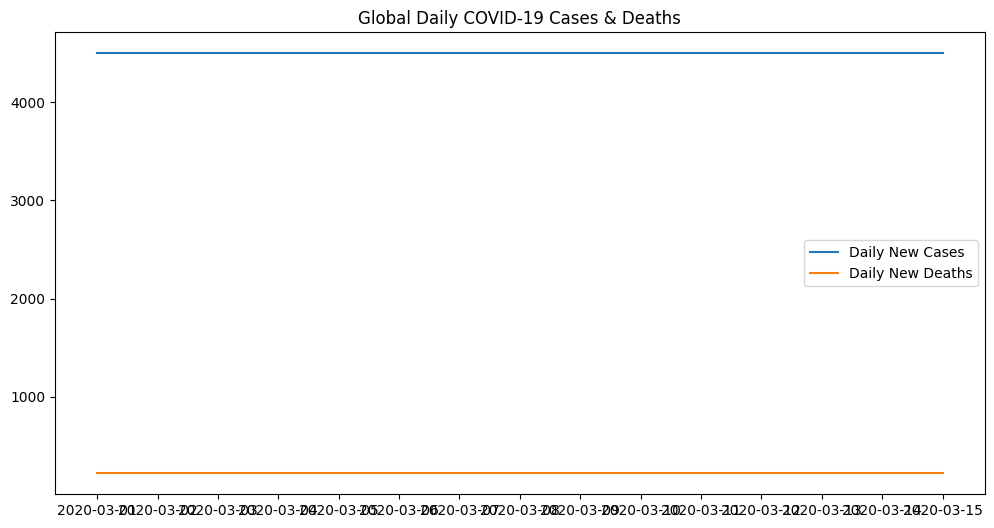

In [15]:
# STEP 11: Global Trend Analysis
global_data = df.groupby("date")[['new_cases','new_deaths']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_data["date"], global_data["new_cases"], label="Daily New Cases")
plt.plot(global_data["date"], global_data["new_deaths"], label="Daily New Deaths")
plt.legend()
plt.title("Global Daily COVID-19 Cases & Deaths")
plt.show()

/tmp/ipython-input-1510866570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cases.values, y=top_cases.index, palette="Reds_r")


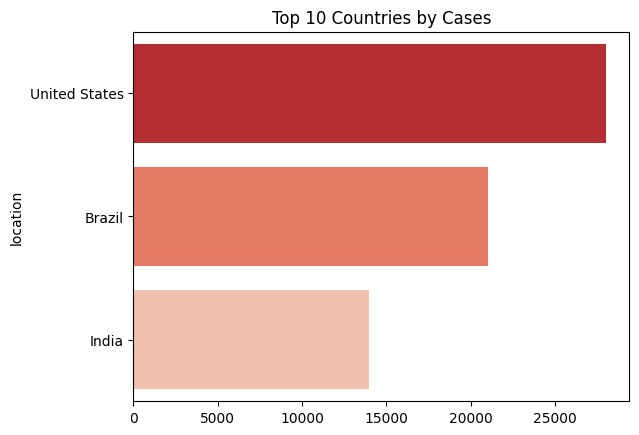

In [18]:
# STEP 12: Top 10 Countries by Cases
latest = df[df["date"] == df["date"].max()]

top_cases = latest.groupby("location")["total_cases"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cases.values, y=top_cases.index, palette="Reds_r")
plt.title("Top 10 Countries by Cases")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wnj9to8/6flj8kem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wnj9to8/pmq1vws5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12110', 'data', 'file=/tmp/tmp3wnj9to8/6flj8kem.json', 'init=/tmp/tmp3wnj9to8/pmq1vws5.json', 'output', 'file=/tmp/tmp3wnj9to8/prophet_modelinyr5qnn/prophet_model-20250920135613.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:56:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:13 - cmdstanpy - INFO - Chain [1] done processing
INF

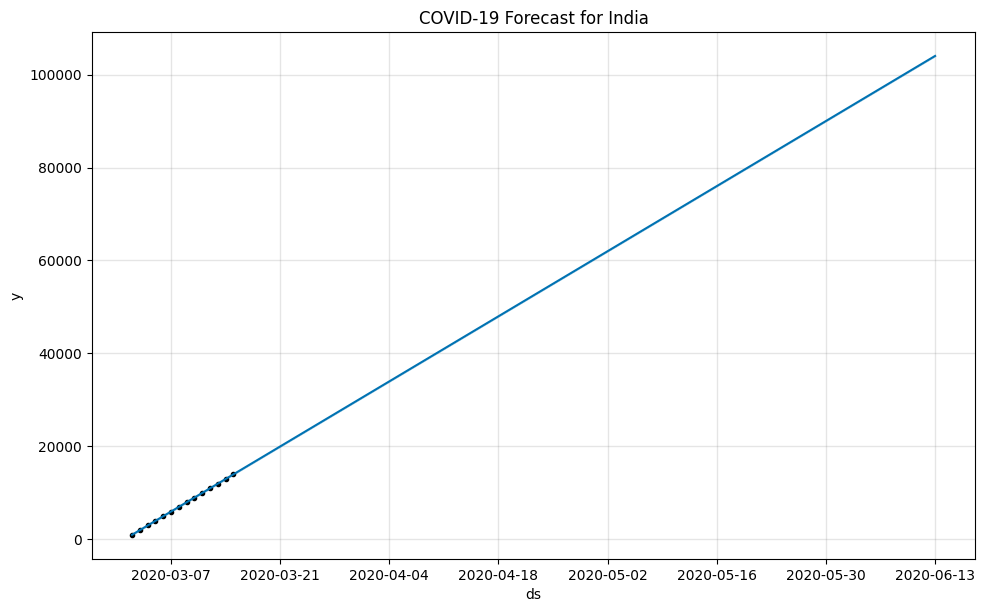

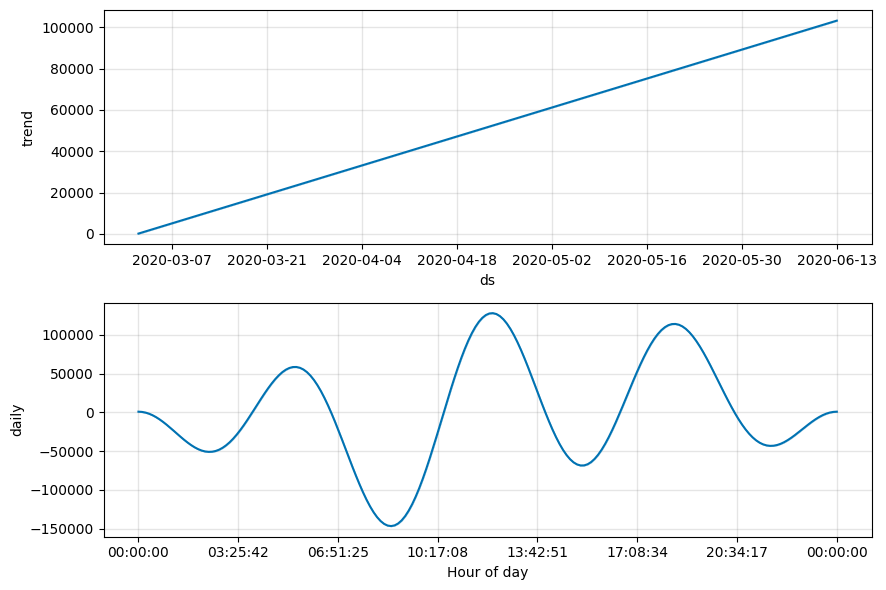

In [20]:
# STEP 13: Forecasting with Prophet
from prophet import Prophet

country = "India"  # change to any country
india_data = df[df["location"] == country][["date","total_cases"]]
india_data = india_data.rename(columns={"date":"ds","total_cases":"y"})
india_data = india_data[india_data["y"] > 0]

model = Prophet(daily_seasonality=True)
model.fit(india_data)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title(f"COVID-19 Forecast for {country}")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()